# Python для сбора и анализа данных

*Автор задач: Тамбовцева А.А.*

## Практикум 2: строки, списки, цикл for

### Задача 1

Чип и Дейл собирают орехи, чтобы Спасатели (а их в команде пятеро) смогли ими перекусить во время совместного вечернего просмотра фильма о пришельцах. Спасатели всегда делят орехи поровну.

Напишите программу, которая запрашивает с клавиатуры число орехов, набранное Чипом и Дейлом по-отдельности (два целых числа через пробел) и выводит на экран через пробел число орехов, которое достанется каждому из Спасателей, и число орехов, которое при таком дележе останется.

**Пример работы программы**

Ввод:

    20 30

Вывод:

    10 0

Ввод:

    30 12

Вывод:

    8 2

Ввод:

    62 34

Вывод:

    19 1

In [1]:
nuts = input()
nuts_L = nuts.split()
S = int(nuts_L[0]) + int(nuts_L[1])
print(S // 5, S % 5)

62 34
19 1


### Задача 2

Напишите программу, которая запрашивает с клавиатуры два целых числа через пробел (назовём их $a$ и $b$) и выводит на экран перечень целых чисел от $a$ до $b$ включительно.

**Пример работы программы**

Ввод:

    2 7

Вывод:

    2 3 4 5 6 7

In [2]:
inp = input().split()
a, b = int(inp[0]), int(inp[1]) 
print(*range(a, b + 1))

2 10
2 3 4 5 6 7 8 9 10


In [3]:
# без * решаемо, но грустно
# .join() скеивает список строк, а range() создает список чисел,
# надо перевести типы элементов

print(" ".join([str(i) for i in range(a, b + 1)]))

2 3 4 5 6 7 8 9 10


### Задача 3

Напишите программу, которая запрашивает с клавиатуры целое число $n$ и выводит на экран сумму квадратов чисел от 1 до $n$ включительно.

Решите эту задачу:

* в предположении, что создавать список и считать сумму его элементов можно;
* в предположении, что создавать списки нельзя.

In [4]:
# со списком

n = int(input())
squares = [i ** 2 for i in range(n + 1)]
print(sum(squares))

5
55


In [5]:
# без списка

n = int(input())
S = 0
for i in range(n + 1):
    S += i ** 2
print(S)

5
55


### Задача 4

Напишите программу, которая приводит текст, сохранённый в переменной `text`, к нормальному виду. Нормальный вид текста: текст состоит только из слов в начальной форме, записанных маленькими буквами через пробел, нет никаких посторонних символов.

In [6]:
# фрагмент статьи Википедии о Владимире Высоцком

text = """
Как поэт Высоцкий реализовал себя, прежде всего, в жанре 
авторской песни. Первые из написанных им произведений относятся 
к началу 1960-х годов. Вначале они исполнялись в кругу друзей, 
позже получили широкую известность благодаря распространявшимся 
по стране магнитофонным записям. Поэзия Высоцкого отличалась 
многообразием тем (уличные, лагерные, военные, сатирические, 
бытовые, сказочные, «спортивные» песни), остротой смыслового 
подтекста и акцентированной социально-нравственной позицией 
автора. В его произведениях, рассказывающих о внутреннем 
выборе людей, поставленных в экстремальные обстоятельства, 
прослеживались экзистенциальные мотивы. Творческая эволюция 
Высоцкого прошла в несколько этапов. В его раннем творчестве 
преобладали уличные и дворовые песни. С середины 1960-х годов 
тематика произведений начала расширяться, а песенные циклы — 
складываться в новую «энциклопедию русской жизни». 
В 1970-х годах значительную часть творчества Высоцкого 
составляли песни и стихотворения исповедально-философского характера, 
поэт часто обращался к вечным вопросам бытия.
"""

Алгоритм работы:

1. Привести все буквы к нижнему регистру.
2. Заменить все знаки препинания на пробелы.
3. Разбить текст на слова и получить список слов.
4. Избавиться от лишних пробелов в словах внутри полученного списка (если есть).
5. Привести каждое слово в списке к начальной форме.
6. Склеить все слова в начальной форме в одну строку с текстом.

**Дополнение.**

Давайте разобьём текст на отдельные слова и приведём их к единой начальной форме! Так, все существительные будут стоять в единственном числе в именительном падеже, все прилагательные – тоже в единственном числе в именительном падеже, но ещё и в мужском роде, глаголы – в неопределённой форме. Эта процедура называется **лемматизацией** (*лемма* – словарная форма слова). Иногда для унификации слов используют другую процедуру – **стемминг** (от английского *stem* – основа), которая предполагает отсечение всех формообразующих морфем вроде окончаний и суффиксов глаголов, но для нашей цели она не подходит – слова в облаке слов будут некрасиво обрублены.

**Полезный код 1.** Знаки препинания можно извлечь из строки `punctuation`, которая хранится в модуле `string`. Однако там не все знаки препинания, например, нет русских кавычек-ёлочек (`«»`) и длинного тире (`–`). Их можно добавить самостоятельно!

In [7]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Полезный код 2.** Привести слова к начальной форме без специальных библиотек не получится. Можно установить библиотеку `pymorphy2`, в неё встроен морфологический анализатор – программа, которая позволяет выполнять морфологический разбор слова.

Установка библиотеки:

In [ ]:
!pip install pymorphy2

**NB.** Если у вас Python версии выше 3.7, замените `pymorphy2` в коде ниже на `pymorphy3`, более старая версия `pymorphy` не работает корректно с новым Python.

Команда `pip install ...` используется для установки библиотек, к ней можно добавить опцию `--upgrade` на случай, если библиотека на компьютере уже установлена в более старой версии, а мы хотим её обновить. Символ `!` в начале строки сообщает Jupyter, что это особая операция, как будто бы запускаемая с командной строки или из терминала, а не код Python с соответствующим синтаксисом. 

Пример работы:

In [8]:
from pymorphy2 import MorphAnalyzer

# создаем анализатор (объект класса MorphAnalyzer)
morph = MorphAnalyzer()

# анализируем
print(morph.parse('экономистами'))

# делаем разбор и забираем начальную форму
print(morph.parse('экономистами')[0].normal_form)

[Parse(word='экономистами', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='экономист', score=1.0, methods_stack=((DictionaryAnalyzer(), 'экономистами', 52, 10),))]
экономист


Метод `.parse()` вернул список всех возможных вариантов разбора слова, упорядоченный от наиболее вероятного до наименее вероятного. Так, с самой большой вероятностью слово «экономистами» – это творительный падеж слова «экономист» (`NOUN` – существительное, `anim` – одушевленное, `masc plur` – мужской род множественное число, `ablt` – творительный падеж, аблатив). 

В нашем случае вариант разбора один, посмотрим, как выглядит результат разбора слова «стекло». Оно может быть как и существительным (*оконное стекло*) в именительном падеже или винительном, так и глаголом (*молоко стекло на пол*) в прошедшем времени.

In [10]:
morph.parse('стекло')

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)),
 Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)),
 Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]

С самой маленькой вероятностью это слово является формой глагола «стечь» (`VERB` – глагол, `perf` – прошедшее время, `intr` – непереходный глагол, `indc` – изъявительное наклонение, индикатив).

In [11]:
# приводим к нижнему регистру
# выполняем замену каждого символа в punctuation

text = text.lower()
punctuation = punctuation + "«»" + "–"
for p in punctuation:
    text = text.replace(p, " ")

# разбиваем текст на слова
# приводим каждое слово к начальной форме

words = text.split()
words_norm = [morph.parse(w)[0].normal_form for w in words]


# склеиваем все обратно в одну строку

final_text = " ".join(words_norm) 
print(final_text)

как поэт высоцкий реализовать себя прежде весь в жанр авторский песня первый из написать они произведение относиться к начало 1960 х год вначале они исполняться в круг друг поздний получить широкий известность благодаря распространяться по страна магнитофонный запись поэзия высоцкий отличаться многообразие тем уличный лагерный военный сатирический бытовой сказочный спортивный песня острота смысловой подтекст и акцентировать социально нравственный позиция автор в он произведение рассказывать о внутренний выбор человек поставить в экстремальный обстоятельство прослеживаться экзистенциальный мотив творческий эволюция высоцкий пройти в несколько этап в он ранний творчество преобладать уличный и дворовый песня с середина 1960 х год тематика произведение начало расширяться а песенный цикл — складываться в новый энциклопедия русский жизнь в 1970 х год значительный часть творчество высоцкий составлять песня и стихотворение исповедальный философский характер поэт часто обращаться к вечный вопро

### Задача 5 (бонус!)

Напишем программу, которая приводит текст к нормальной форме по схеме, предложенной в предыдущей задаче, и строит для него облако слов. Для начала установим библиотеку `wordcloud` для построения облака слов:

In [ ]:
!pip install wordcloud

**NB.** Если далее при построении облака с помощью `WordCloud()` или его отрисовке выводятся странные ошибки (что-то про `True Fonts`, например), попробуйте переустановить библиотеку `Pillow`, от неё зависят некоторые процедуры в `wordcloud`: 

    !pip install Pillow --upgrade

Импортируем оттуда функцию `WordCloud()` (на самом деле, класс `WordCloud`, который создает объект типа `WordCloud` с определёнными методами):

In [14]:
from wordcloud import WordCloud

Импортируем модуль `pyplot` из библиотеки `matplotlib` для отрисовки графиков:

In [15]:
from matplotlib import pyplot as plt

Генерируем облако слов через метод `.generate()` и отрисовываем его:

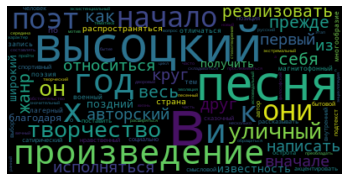

In [16]:
# plt.axis(): выключаем оси, нам не нужны засечки по осям Ox, Oy

wordcloud = WordCloud().generate(final_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Чтобы убрать стоп-слова (частые слова вроде предлогов, союзов и местоимений, которые не несут большой смысловой нагрузки), загрузим их из текстового файла со словами `stop_words_ru.txt`.

In [19]:
# открываем файл и считываем строки

file = open("stop_words_ru.txt", encoding = "utf-8")
lines = file.readlines()

In [20]:
# удаляем лишние \n в конце строк
# смотрим на первые 30 слов

words = [line.strip() for line in lines]
print(words[0:30])

['а', 'е', 'и', 'ж', 'м', 'о', 'на', 'не', 'ни', 'об', 'но', 'он', 'мне', 'мои', 'мож', 'она', 'они', 'оно', 'мной', 'много', 'многочисленное', 'многочисленная', 'многочисленные', 'многочисленный', 'мною', 'мой', 'мог', 'могут', 'можно', 'может']


Осталось учесть этот список при генерации облака слов – аргумент `stopwords`:

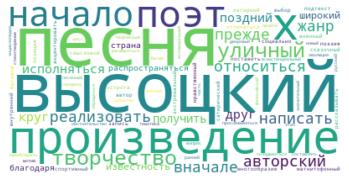

In [21]:
# заодно сделаем цвет фона белым

wordcloud = WordCloud(stopwords = words, 
                     background_color="white").generate(final_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Добавим маску, чтобы сделать облако слов похожим на гитару. Импортируем функцию `Image()` для обработки изображений и библиотеку `numpy` для превращения изображения в числовой массив:

In [22]:
from PIL import Image
import numpy as np

Создаём массив на основе изображения `guitar.jpeg` ([ссылка](https://www.dropbox.com/s/upcedsfo0nfy42y/guitar.jpeg?dl=0) на картинку, источник [Freepik](https://www.freepik.com/free-vector/silhouettes-set-acoustic-guitars_1127701.htm#query=guitar%20silhouette&position=0&from_view=search&track=ais)):

In [24]:
my_mask = np.array(Image.open("guitar.jpeg"))

In [25]:
# проверим размерность массива: 
# изображение 774 на 378 пикселей, каждый пиксель описывается
# тремя числами – формат цвета RGB (red + green + blue)

my_mask.shape

(774, 378, 3)

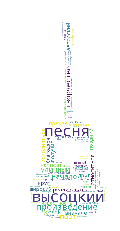

In [27]:
# добавляем аргумент mask

wordcloud = WordCloud(background_color = "white",
                      mask = my_mask, 
                      stopwords = words).generate(final_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Дополнение.**

Для полного счастья можем сделать график побольше (`figsize` – размер в дюймах, делаем  8 на 4), улучшить разрешение (`dpi` – разрешение 300 точек на дюйм, хорошо даже для печати) и размер самого облака тоже увеличить (аргументы `width` и `height` по умолчанию 400 на 200):

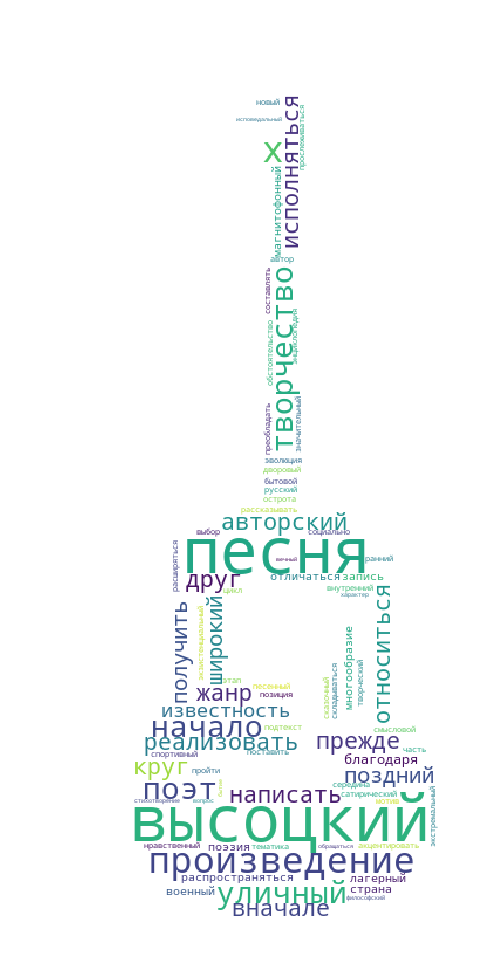

In [36]:
fig, ax = plt.subplots(figsize = (8, 4), dpi = 300) 

wcloud = WordCloud(background_color = "white",
                   mask = my_mask, 
                   stopwords = words,
                   width = 800, 
                   height = 1600).generate(final_text)
plt.imshow(wcloud)
plt.axis("off")
plt.show()

# можно добавить для выгрузки в файл, будет рядом с текущим ipynb

fig.savefig("cloud.png")

**Пояснения к коду.** Функция `subplots()` создает два объекта:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG, JPEG или PDF. Вообще функция `subplots()`, как следует из её названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.